# NetworkX Stats based on Graphs extracted with OSMnx

In [1]:
import networkx as nx
import osmnx as ox
% matplotlib inline

/home/donk23/Workspace/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# INPUT

# Path to SR drive_service network
path = "data/steyr_driveService.graphml"

# Load graph
G = nx.read_graphml(path)
print nx.info(G)

Name: unnamed_UTM
Type: MultiDiGraph
Number of nodes: 2254
Number of edges: 5347
Average in degree:   2.3722
Average out degree:   2.3722


In [4]:
# Centrality Measures

# Beweenness Centrality
betw_cent = nx.betweenness_centrality(G)
node_btw_max, betw_max = ("", 0)
for k,v in betw_cent.iteritems():
    if v > betw_max:
        node_btw_max = k
        betw_max = v
    else:
        pass
    
print "\nBetweenness Centrality"
print node_btw_max + ": " + str(betw_max)

# Closeness Centrality
close_cent = nx.closeness_centrality(G)

node_cl_max, close_max = ("", 0)
for k,v in close_cent.iteritems():
    if v > close_max:
        node_cl_max = k
        close_max = v
    else:
        pass
    
print "\nCloseness Centrality"
print node_cl_max + ": " + str(close_max)



Betweenness Centrality
158708541: 0.229670582608

Closeness Centrality
1291503865: 0.0384425606884


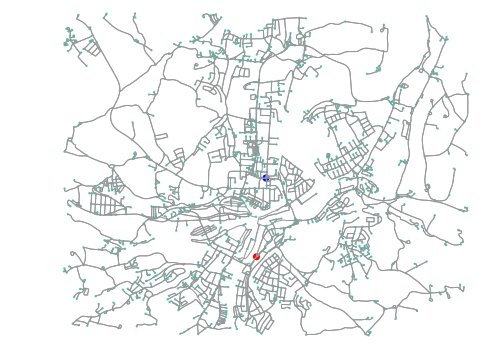

In [5]:
# Plot Centrality Measures on map
north, south, east, west = 48.0746, 48.0247, 14.4698, 14.3758
G_map = ox.graph_from_bbox(north, south, east, west, network_type="drive_service")
G_map = ox.project_graph(G_map)

node_size = [50 if str(node) == node_btw_max else (50 if str(node) == node_cl_max else 5) 
             for node in G_map.nodes()]
node_color = ["r" if str(node) == node_btw_max else ("b" if str(node) == node_cl_max else "#33d5bb") 
              for node in G_map.nodes()]
fig, ax = ox.plot_graph(G_map, node_size=node_size, node_color=node_color)